In [1]:
from scipy.linalg import toeplitz
from models import ModelLinReg
from gradient_descent import GradientDescent
import numpy as np
from utils import inspector
import matplotlib.pyplot as plt
from sgd import SGD

In [2]:
n_samples = 1000	
n_features = 50
corr, std = 0.6, 0.5
n_iter = 50
strength = 1e-3
w0 = np.zeros(n_features)
n_samples = 500

nnz = 20
idx = np.arange(n_features)
w_true = (-1) ** idx * np.exp(-idx / 10.)
w_true[nnz:] = 0.

print("Creating model...")
model = ModelLinReg(n_samples=n_samples, corr=corr, std=std, strength=strength, w0=w_true)
print("Simulating data...")
X, y = model.simu_linreg()

gradient_descent = GradientDescent(w0=w0, n_iter=n_iter, model=model, verbose=True)
callback_gd = inspector(model, n_iter=n_iter)
w_gd = gradient_descent.gd(callback=callback_gd)

callback_agd = inspector(model, n_iter=n_iter)
w_agd = gradient_descent.agd(callback=callback_agd)

callback_hb = inspector(model, n_iter=n_iter)
w_hb = gradient_descent.hb(callback=callback_hb)

callback_cgd = inspector(model, n_iter=n_iter)
w_cgd = gradient_descent.cgd(callback=callback_cgd)

Creating model...
Simulating data...
Lauching GD solver...
   it    |   obj   
       0 | 9.72e-01
      10 | 2.82e-01
      20 | 1.66e-01
      30 | 1.31e-01
      40 | 1.18e-01
      50 | 1.14e-01
Lauching AGD solver...
   it    |   obj   
       0 | 9.72e-01
      10 | 1.54e-01
      20 | 1.14e-01
      30 | 1.12e-01
      40 | 1.12e-01
      50 | 1.12e-01
Lauching HB solver...
   it    |   obj   
       0 | 9.72e-01
      10 | 1.12e-01
      20 | 1.11e-01
      30 | 1.11e-01
      40 | 1.11e-01
      50 | 1.11e-01
Lauching CGD solver...
   it    |   obj   
       0 | 9.72e-01
      10 | 1.12e-01
      20 | 1.11e-01
      30 | 1.11e-01
      40 | 1.11e-01
      50 | 1.11e-01


In [3]:
callback_long = inspector(model, n_iter=1000, verbose=False)
md = GradientDescent(w0=w0, n_iter=2000, model=model, verbose=False)
w_gd = md.gd(callback=callback_long)
obj_min = callback_long.objectives[-1]

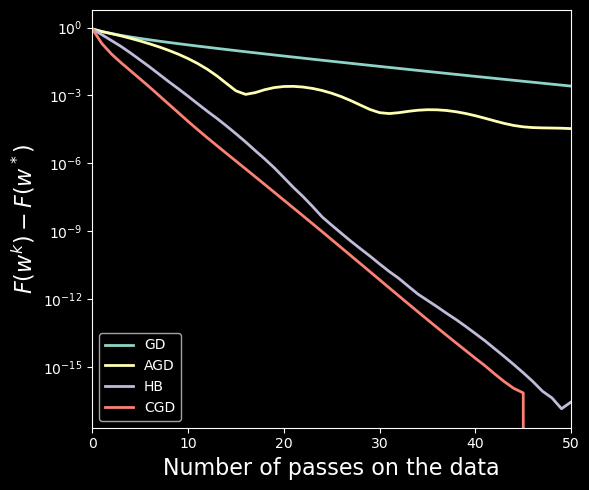

In [4]:
callbacks = [callback_gd, callback_agd, callback_hb, callback_cgd]
names = ["GD", "AGD", "HB", "CGD"]
plt.figure(figsize=(6, 5))
plt.yscale("log")

for callback, name in zip(callbacks, names):
    objectives = np.array(callback.objectives)
    objectives_dist = objectives - obj_min    
    plt.plot(objectives_dist, label=name, lw=2)

plt.tight_layout()
plt.xlim((0, n_iter))
plt.xlabel("Number of passes on the data", fontsize=16)
plt.ylabel(r"$F(w^k) - F(w^*)$", fontsize=16)
plt.legend(loc='lower left')
plt.tight_layout()

In [5]:
idx_samples = np.random.randint(0, model.n_samples, model.n_samples * n_iter)
step = 1e-1
callback_sgd = inspector(model, n_iter=n_iter)
callback_sgd_av = inspector(model, n_iter=n_iter)
callback_svrg = inspector(model, n_iter=n_iter)

sgd_class = SGD(model=model, w0=w0, n_iter=model.n_samples * n_iter)


sgd = sgd_class.sgd(callback=callback_sgd, idx_samples=idx_samples, step=step)
w_sgd_av = sgd_class.sgd(callback=callback_sgd_av, idx_samples=idx_samples, step=step)
svrg = sgd_class.svrg(callback=callback_svrg, idx_samples=idx_samples, step=1/100)

   it    |   obj   
       0 | 9.72e-01
      10 | 5.93e-01
      20 | 4.78e-01
      30 | 4.34e-01
      40 | 4.09e-01
      50 | 4.10e-01
   it    |   obj   
       0 | 9.72e-01
      10 | 5.93e-01
      20 | 4.78e-01
      30 | 4.34e-01
      40 | 4.09e-01
      50 | 4.10e-01
   it    |   obj   
       0 | 9.72e-01
      10 | 8.35e+20
      20 | 3.21e+46
      30 | 1.33e+72
      40 | 5.72e+97
      50 | 2.44e+123
